# Experimentos para seleção de Modelo de regressão

In [68]:
import sys
def category_encoders():
    package = 'category_encoders'
    try:
        return __import__(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install category_encoders
        return None

In [69]:
category_encoders()

<module 'category_encoders' from '/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/__init__.py'>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
import math
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing

In [71]:
def mean(l):
    acc = 0
    for i in l:
        acc+=i
    return acc/(len(l))

In [72]:
def std(l):
    m = mean(l)
    acc = 0
    for i in l:
        acc+= (i - m)**2
    return math.sqrt(acc/(len(l)))

In [73]:
plt.rcParams["figure.figsize"] = (12, 7)

In [74]:
df = pd.read_csv("../raw_data.csv")
# df = pd.read_csv("../final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Editora       3917 non-null   object 
 1   ISBN          3917 non-null   object 
 2   Ano           3917 non-null   float64
 3   Edição        3917 non-null   float64
 4   Origem        3917 non-null   object 
 5   Encadernação  3917 non-null   object 
 6   Idioma        3917 non-null   object 
 7   País          3917 non-null   object 
 8   Páginas       3917 non-null   float64
 9   preço         3917 non-null   float64
 10  nome          3917 non-null   object 
 11  categoria     3917 non-null   object 
 12  Autores       3916 non-null   object 
dtypes: float64(4), object(9)
memory usage: 397.9+ KB


In [75]:
#df = df.drop(df[df['preço'] > 400].index)

## Testando modelo Base line com apenas features numéricas

In [76]:
X = df[['Ano','Edição','Páginas']]
y = df['preço']

In [77]:
X['Ano'] = X['Ano'].astype(int)
X['Edição'] = X['Edição'].astype(int)
X['Páginas'] = X['Páginas'].astype(int)
X

<ipython-input-77-5ff5fe48f8ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ano'] = X['Ano'].astype(int)
<ipython-input-77-5ff5fe48f8ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Edição'] = X['Edição'].astype(int)
<ipython-input-77-5ff5fe48f8ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Ano,Edição,Páginas
0,2018,1,384
1,2014,1,384
2,2006,1,728
3,2021,1,288
4,2015,1,20
...,...,...,...
3912,2009,1,440
3913,2014,1,408
3914,2021,1,246
3915,2017,1,252


In [78]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)

In [79]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média: {scores.mean()}')

[0.43169665 0.23983468 0.36822866 0.29581492 0.29016359 0.2772314
 0.36295862 0.18756651 0.1632418  0.22161373]
Pontuação r2 média: 0.2838350543212813


In [80]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.43169665 0.23983468 0.36822866 0.29581492 0.29016359 0.2772314
 0.36295862 0.18756651 0.1632418  0.22161373]
Pontuação r2 média com normalização standard: 0.2838350543212816


In [81]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.43169665 0.23983468 0.36822866 0.29581492 0.29016359 0.2772314
 0.36295862 0.18756651 0.1632418  0.22161373]
Pontuação r2 média com normalização min_max: 0.28383505432128137


In [82]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.43845369 0.23011755 0.38541296 0.3079302  0.29001251 0.2516391
 0.37345685 0.19067425 0.16337422 0.21070144]
Pontuação r2 média com normalização standard: 0.2841772756084047


## Tratando features categóricas

### Codificando origem

In [83]:
encoder=ce.OneHotEncoder(cols='Origem',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Origem','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Origem_NACIONAL,Origem_IMPORTADO,preço
0,1.0,0.0,49.90
1,1.0,0.0,59.90
2,1.0,0.0,130.00
3,1.0,0.0,38.42
4,1.0,0.0,49.90
...,...,...,...
3912,1.0,0.0,114.00
3913,1.0,0.0,98.00
3914,1.0,0.0,49.90
3915,1.0,0.0,84.90


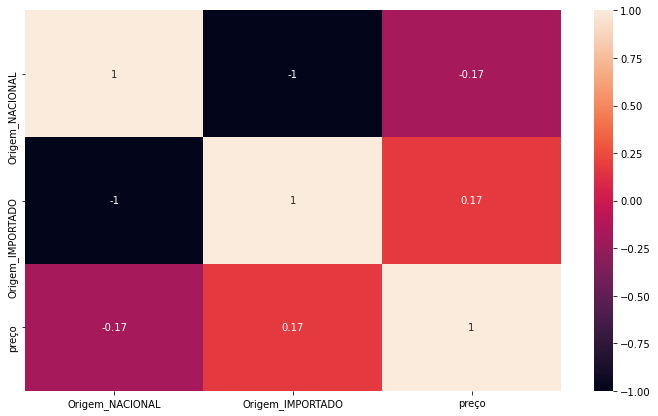

In [84]:
corr = data_encoded[['Origem_NACIONAL','Origem_IMPORTADO','preço']].corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [85]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.43643865 0.28168696 0.40034972 0.31303852 0.35834258 0.34194676
 0.37211642 0.24205315 0.17271134 0.27712573]
Pontuação r2 média com normalização standard: 0.31958098456828354


**Feature melhorou o modelo, então será mantida**

In [87]:
X = X_test

### Codificando País

In [88]:
encoder=ce.OneHotEncoder(cols='País',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['País','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,País_BRASIL,País_ESTADOS UNIDOS,País_FRANÇA,País_INGLATERRA,País_PORTUGAL,País_ESPANHA,País_ALEMANHA,País_ITALIA,País_MEXICO,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.90


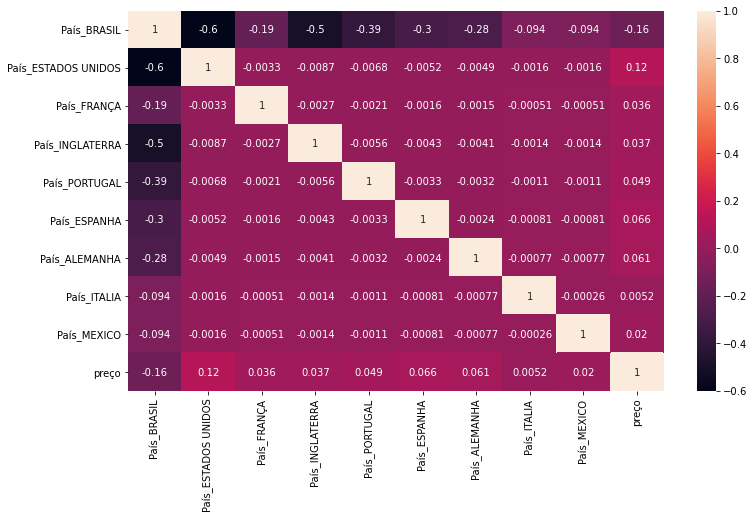

In [89]:
corr = data_encoded.filter(regex='(^País_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [90]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.43794154 0.15729296 0.37867682 0.30785592 0.36440104 0.28035487
 0.38084451 0.25689377 0.17357905 0.2643927 ]
Pontuação r2 média com normalização standard: 0.3002233188707973


**Feature não melhorou o modelo**

### Codificando Idioma

In [91]:
encoder=ce.OneHotEncoder(cols='Idioma',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Idioma','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Idioma_PORTUGUÊS,Idioma_INGLÊS,Idioma_PORT. PORTUGAL,Idioma_ESPANHOL,Idioma_FRANCÊS,Idioma_ITALIANO,Idioma_JAPONÊS,Idioma_ALEMÃO,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.90


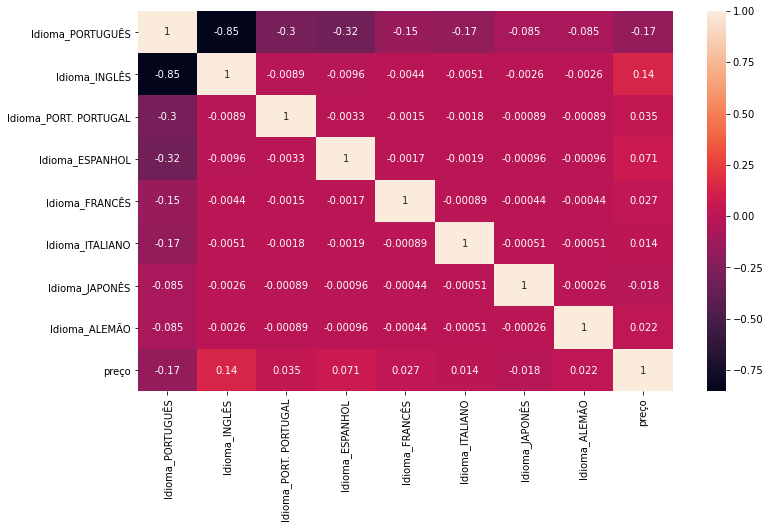

In [92]:
corr = data_encoded.filter(regex='(^Idioma_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [93]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.42436569 0.28659156 0.40303325 0.22593816 0.36321824 0.28615136
 0.36798059 0.24903107 0.17565488 0.263104  ]
Pontuação r2 média com normalização standard: 0.30450688059035563


**Feature piorou o modelo**

### Codificando encadernação

In [94]:
encoder=ce.OneHotEncoder(cols='Encadernação',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Encadernação','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Encadernação_BROCHURA,Encadernação_CAPA DURA,Encadernação_LÂMINA,Encadernação_FLEXIVEL,Encadernação_CAPA DURA C/SOBRECAP,Encadernação_ESPIRAL,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,38.42
4,0.0,1.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,0.0,1.0,0.0,0.0,0.0,0.0,84.90


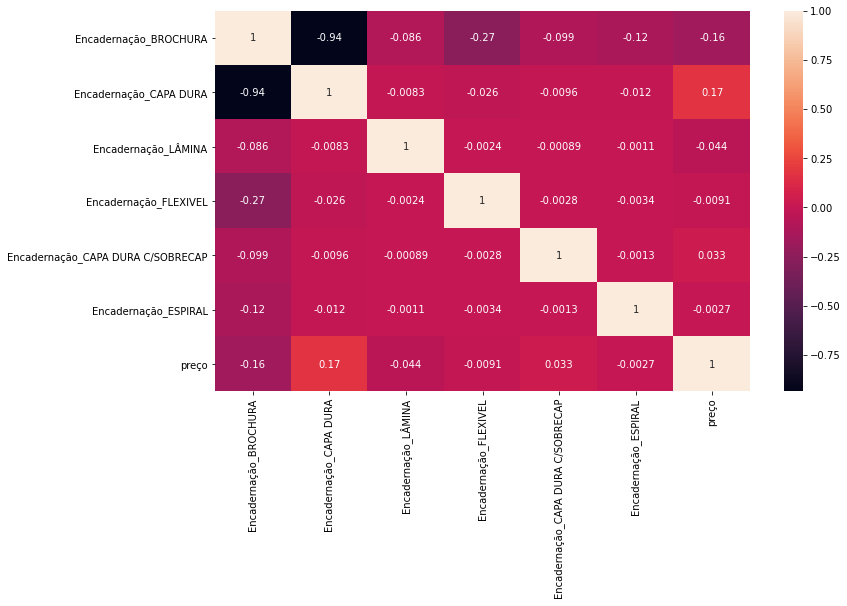

In [95]:
corr = data_encoded.filter(regex='(^Encadernação_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [96]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.42838768 0.29795638 0.42224102 0.31657187 0.32690863 0.34611235
 0.39583922 0.27613854 0.19061676 0.29374622]
Pontuação r2 média com normalização standard: 0.3294518678567707


**Feaure melhorou o modelo então será mantida**

In [97]:
X = X_test

### Categoria

In [98]:
df['categoria'].nunique()

41

In [99]:
encoder= ce.BaseNEncoder(cols=['categoria'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['categoria','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,categoria_0,categoria_1,categoria_2,categoria_3,preço
0,0,0,0,1,49.90
1,0,0,0,2,59.90
2,0,0,0,2,130.00
3,0,0,0,3,38.42
4,0,0,0,3,49.90
...,...,...,...,...,...
3912,0,1,2,3,114.00
3913,0,1,2,3,98.00
3914,0,1,2,3,49.90
3915,0,1,2,4,84.90


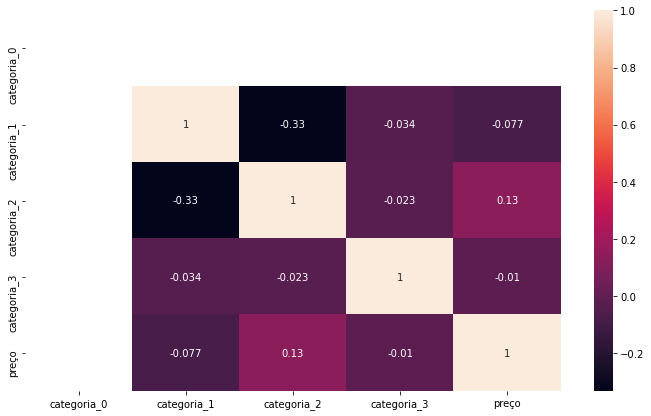

In [100]:
corr = data_encoded.filter(regex='(^categoria_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [101]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.49607239 0.37072853 0.43018689 0.38396685 0.40113257 0.34491383
 0.45744917 0.39107617 0.21089164 0.35676986]
Pontuação r2 média com normalização standard: 0.3843187908747904


**Feature melhorou o modelo, então será mantida**

In [102]:
X = X_test

### Codificando editora

In [103]:
df['Editora'].nunique()

502

In [104]:
encoder= ce.BaseNEncoder(cols=['Editora'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['Editora','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Editora_0,Editora_1,Editora_2,Editora_3,Editora_4,preço
0,0,0,0,0,1,49.90
1,0,0,0,0,2,59.90
2,0,0,0,0,3,130.00
3,0,0,0,0,4,38.42
4,0,0,0,1,0,49.90
...,...,...,...,...,...,...
3912,0,0,0,1,4,114.00
3913,0,0,0,1,4,98.00
3914,0,0,0,1,4,49.90
3915,0,3,4,3,3,84.90


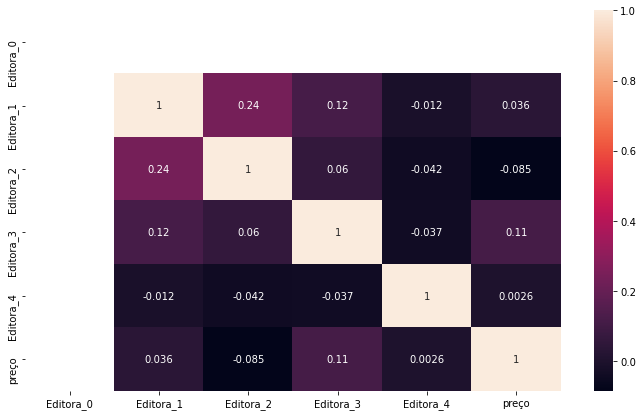

In [105]:
corr = data_encoded.filter(regex='(^Editora_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [106]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.47762342 0.39480267 0.45315404 0.4247289  0.43090182 0.40188587
 0.49889124 0.44532125 0.225167   0.37009582]
Pontuação r2 média com normalização standard: 0.41225720357872736


**Feature Melhorou o modelo, então será mantida**

In [107]:
X = X_test

### Codificando autores

In [108]:
df['Autores'].nunique()

3008

In [109]:
encoder= ce.BaseNEncoder(cols=['Autores'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['Autores','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Autores_0,Autores_1,Autores_2,Autores_3,Autores_4,Autores_5,preço
0,0,0,0,0,0,1,49.90
1,0,0,0,0,0,2,59.90
2,0,0,0,0,0,3,130.00
3,0,0,0,0,0,4,38.42
4,0,0,0,0,1,0,49.90
...,...,...,...,...,...,...,...
3912,0,4,2,3,1,0,114.00
3913,0,4,4,0,1,3,98.00
3914,0,4,2,3,0,4,49.90
3915,0,4,3,2,0,0,84.90


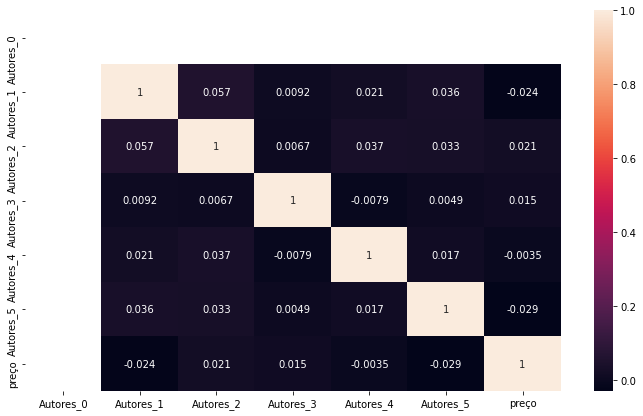

In [110]:
corr = data_encoded.filter(regex='(^Autores_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [111]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.47023054 0.39081222 0.41328158 0.44702894 0.42460468 0.36805162
 0.48415012 0.46814275 0.23440006 0.38226998]
Pontuação r2 média com normalização standard: 0.4082972506696042


**Feature manteve ou piorou o resultado, então será desprezada**

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ano                                3917 non-null   int64  
 1   Edição                             3917 non-null   int64  
 2   Páginas                            3917 non-null   int64  
 3   Origem_NACIONAL                    3917 non-null   float64
 4   Origem_IMPORTADO                   3917 non-null   float64
 5   Encadernação_BROCHURA              3917 non-null   float64
 6   Encadernação_CAPA DURA             3917 non-null   float64
 7   Encadernação_LÂMINA                3917 non-null   float64
 8   Encadernação_FLEXIVEL              3917 non-null   float64
 9   Encadernação_CAPA DURA C/SOBRECAP  3917 non-null   float64
 10  Encadernação_ESPIRAL               3917 non-null   float64
 11  categoria_0                        3917 non-null   int64

### Testando novamente o modelo

In [113]:
X

,Ano,Edição,Páginas,Origem_NACIONAL,Origem_IMPORTADO,Encadernação_BROCHURA,Encadernação_CAPA DURA,Encadernação_LÂMINA,Encadernação_FLEXIVEL,Encadernação_CAPA DURA C/SOBRECAP,Encadernação_ESPIRAL,categoria_0,categoria_1,categoria_2,categoria_3,Editora_0,Editora_1,Editora_2,Editora_3,Editora_4
0,2018,1,384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1
1,2014,1,384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0,0,0,0,2
2,2006,1,728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0,0,0,0,3
3,2021,1,288,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,0,0,0,0,4
4,2015,1,20,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,2009,1,440,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,0,1,4
3913,2014,1,408,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,0,1,4
3914,2021,1,246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,0,1,4
3915,2017,1,252,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,4,0,3,4,3,3


In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.47331381 0.38906875 0.43287307 0.43233771 0.43671928 0.39844113
 0.49944402 0.45232311 0.21898978 0.36886727]
Pontuação r2 média com normalização standard: 0.4102377922394405


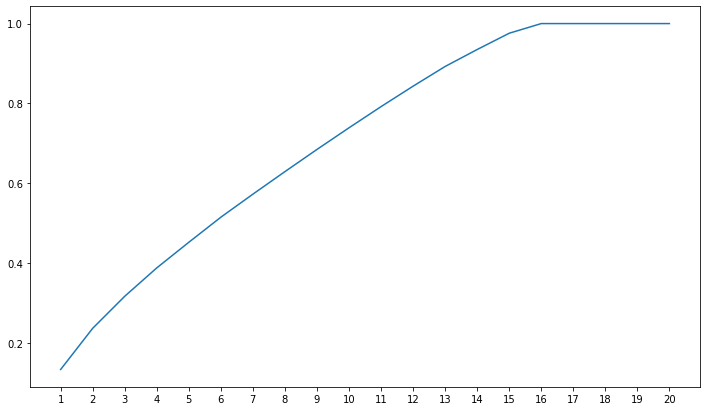

In [116]:
pca = PCA().fit(X_scaled)
variances = np.cumsum(pca.explained_variance_ratio_)
ticks = np.arange(1, X.shape[1]+1, step=1)
plt.plot(ticks,variances)
plt.xticks(ticks)
plt.show()

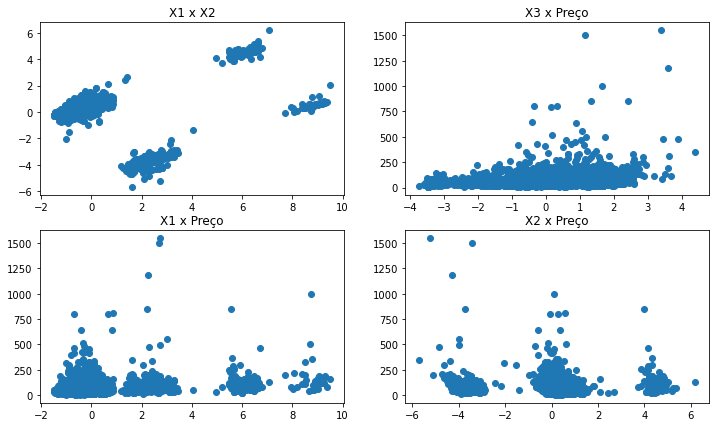

In [117]:
pca = PCA(n_components=16)
projection = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(2,2)
ax[0,0].scatter(projection[:,0],projection[:,1])
ax[0,0].set_title('X1 x X2')
ax[1,0].scatter(projection[:,0],y)
ax[1,0].set_title('X1 x Preço')
ax[1,1].scatter(projection[:,1],y)
ax[1,1].set_title('X2 x Preço')
ax[0,1].scatter(projection[:,2],y)
ax[0,1].set_title('X3 x Preço')
plt.show()

In [118]:
model = MLPRegressor()
scores = cross_val_score(model, projection, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.4945409  0.37289272 0.42080756 0.44090797 0.44127514 0.39726705
 0.48345469 0.44368247 0.22847869 0.37413596]
Pontuação r2 média com normalização standard: 0.409744314599063


In [119]:
model = SVR(kernel='rbf',C=1200)
scores = cross_val_score(model, projection, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.2189786  0.53827068 0.57940962 0.55374741 0.56508751 0.47091972
 0.61934246 0.67731996 0.2218245  0.52429606]
Pontuação r2 média com normalização standard: 0.49691965139265265


**O uso do PCA melhorou os resultados, então será mantido**

In [120]:
X_scaled = projection

## Seleção de modelo

In [121]:
cv_inner = KFold(n_splits=5, shuffle=True, random_state=64)

### Testando Lasso

In [122]:
outer_results = []
y_ = y.to_numpy()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y_[train_ix], y_[test_ix]
    model = linear_model.Lasso()
    space = {'alpha':[.0001,.001,.01,.1,1, .5, 10,100]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))


/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50345.70063560549, tolerance: 1282.6662680889751
  model = cd_fast.enet_coordinate_descent(
/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50437.77853420284, tolerance: 1282.6662680889751
  model = cd_fast.enet_coordinate_descent(
/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51050.81817073934, tolerance: 1282.6662680889751
  model = cd_fast.enet_coordinate_descent(


>R2=0.456, est=0.347, cfg={'alpha': 0.01}
>R2=0.349, est=0.350, cfg={'alpha': 1}


/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917908.2105245078, tolerance: 1622.9894700084362
  model = cd_fast.enet_coordinate_descent(
/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918110.2579496978, tolerance: 1622.9894700084362
  model = cd_fast.enet_coordinate_descent(


>R2=0.397, est=0.344, cfg={'alpha': 0.5}
>R2=0.330, est=0.347, cfg={'alpha': 0.5}
>R2=0.376, est=0.351, cfg={'alpha': 0.5}
>R2=0.409, est=0.347, cfg={'alpha': 0.5}
>R2=0.396, est=0.339, cfg={'alpha': 0.5}


/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781430.8042640174, tolerance: 1448.6989725660403
  model = cd_fast.enet_coordinate_descent(
/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781640.7659276491, tolerance: 1448.6989725660403
  model = cd_fast.enet_coordinate_descent(


>R2=0.311, est=0.348, cfg={'alpha': 1}
>R2=0.212, est=0.343, cfg={'alpha': 1}
>R2=0.313, est=0.350, cfg={'alpha': 0.5}
R2: 0.355 (0.065)


### Testando Ridge

In [123]:
outer_results = []
y_ = y.to_numpy()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y_[train_ix], y_[test_ix]
    model = Ridge()
    space = {'alpha':[.0001,.001,.01,.1,1, .5, 10,100,200,1000]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.452, est=0.349, cfg={'alpha': 100}
>R2=0.346, est=0.350, cfg={'alpha': 200}
>R2=0.399, est=0.347, cfg={'alpha': 200}
>R2=0.332, est=0.349, cfg={'alpha': 200}
>R2=0.374, est=0.351, cfg={'alpha': 200}
>R2=0.415, est=0.348, cfg={'alpha': 200}
>R2=0.393, est=0.341, cfg={'alpha': 200}
>R2=0.306, est=0.351, cfg={'alpha': 200}
>R2=0.215, est=0.350, cfg={'alpha': 1000}
>R2=0.293, est=0.357, cfg={'alpha': 1000}
R2: 0.352 (0.065)


### Testando ElasticNet

In [124]:
outer_results = []
y_ = y.to_numpy()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y_[train_ix], y_[test_ix]
    model = ElasticNet(max_iter=100000)
    space = {'alpha':[.0001,.001,.01,.1,1, .5, 10,100,200,1000],'l1_ratio':[.01,.1,.2,.3,.5,.7,.8,.95]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14652.320548944175, tolerance: 1282.6662680889751
  model = cd_fast.enet_coordinate_descent(


>R2=0.450, est=0.349, cfg={'alpha': 0.1, 'l1_ratio': 0.7}
>R2=0.354, est=0.351, cfg={'alpha': 0.5, 'l1_ratio': 0.8}
>R2=0.399, est=0.347, cfg={'alpha': 0.1, 'l1_ratio': 0.5}
>R2=0.332, est=0.350, cfg={'alpha': 0.1, 'l1_ratio': 0.01}
>R2=0.374, est=0.351, cfg={'alpha': 0.1, 'l1_ratio': 0.5}
>R2=0.428, est=0.348, cfg={'alpha': 0.1, 'l1_ratio': 0.1}
>R2=0.391, est=0.341, cfg={'alpha': 0.1, 'l1_ratio': 0.1}


/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1739.092269660905, tolerance: 1448.6989725660403
  model = cd_fast.enet_coordinate_descent(


>R2=0.313, est=0.352, cfg={'alpha': 0.5, 'l1_ratio': 0.8}
>R2=0.216, est=0.352, cfg={'alpha': 0.5, 'l1_ratio': 0.7}
>R2=0.302, est=0.360, cfg={'alpha': 0.5, 'l1_ratio': 0.7}
R2: 0.356 (0.065)


### Testando SVR

In [126]:
outer_results = []
y_ = y.to_numpy()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y_[train_ix], y_[test_ix]
    model = SVR()
    space = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[.0001,.001,.01,.1,1,10,100,1000]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.225, est=0.454, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.540, est=0.448, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.577, est=0.462, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.545, est=0.454, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.560, est=0.417, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.501, est=0.451, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.602, est=0.402, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.665, est=0.417, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.225, est=0.485, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.515, est=0.489, cfg={'C': 1000, 'kernel': 'rbf'}
R2: 0.496 (0.142)


In [127]:
outer_results = []
y_ = y.to_numpy()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y_[train_ix], y_[test_ix]
    model = SVR()
    space = {'kernel':['rbf'],'C':[900,1000,1100]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.228, est=0.455, cfg={'C': 900, 'kernel': 'rbf'}
>R2=0.539, est=0.449, cfg={'C': 1100, 'kernel': 'rbf'}
>R2=0.577, est=0.464, cfg={'C': 1100, 'kernel': 'rbf'}
>R2=0.549, est=0.454, cfg={'C': 1100, 'kernel': 'rbf'}
>R2=0.557, est=0.418, cfg={'C': 900, 'kernel': 'rbf'}
>R2=0.487, est=0.453, cfg={'C': 1100, 'kernel': 'rbf'}
>R2=0.593, est=0.402, cfg={'C': 900, 'kernel': 'rbf'}
>R2=0.658, est=0.419, cfg={'C': 900, 'kernel': 'rbf'}
>R2=0.223, est=0.486, cfg={'C': 1100, 'kernel': 'rbf'}
>R2=0.515, est=0.489, cfg={'C': 1000, 'kernel': 'rbf'}
R2: 0.493 (0.140)


In [128]:
outer_results = []
y_ = y.to_numpy()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y_[train_ix], y_[test_ix]
    model = SVR()
    space = {'kernel':['rbf'],'C':[950,1200,1100]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.226, est=0.454, cfg={'C': 950, 'kernel': 'rbf'}
>R2=0.538, est=0.450, cfg={'C': 1200, 'kernel': 'rbf'}
>R2=0.579, est=0.466, cfg={'C': 1200, 'kernel': 'rbf'}
>R2=0.554, est=0.455, cfg={'C': 1200, 'kernel': 'rbf'}
>R2=0.559, est=0.418, cfg={'C': 950, 'kernel': 'rbf'}
>R2=0.471, est=0.456, cfg={'C': 1200, 'kernel': 'rbf'}
>R2=0.598, est=0.402, cfg={'C': 950, 'kernel': 'rbf'}
>R2=0.662, est=0.419, cfg={'C': 950, 'kernel': 'rbf'}
>R2=0.222, est=0.487, cfg={'C': 1200, 'kernel': 'rbf'}
>R2=0.519, est=0.489, cfg={'C': 1100, 'kernel': 'rbf'}
R2: 0.493 (0.142)


***C=1200, conseguiu o melhores resultados, mas sem conseguir mais de 50% dos votos. Então será parado por aqui.***

### Plotando resultados do modelo

/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


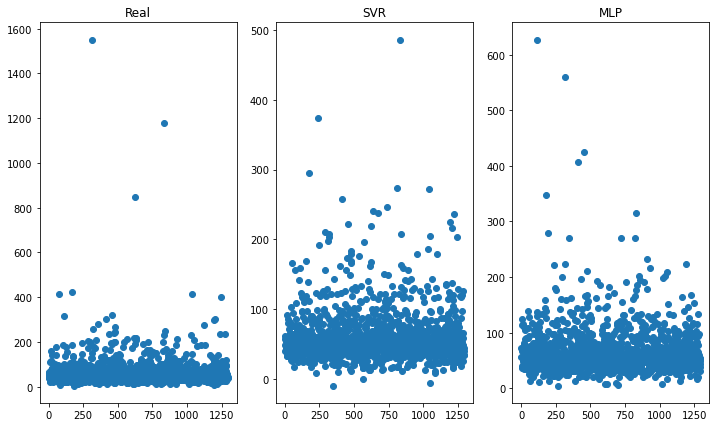

In [129]:
model = SVR(kernel='rbf',C=1200)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

modelmlp = MLPRegressor()
modelmlp.fit(X_train, y_train)
yhatmlp = modelmlp.predict(X_test)

fig,ax = plt.subplots(1,3)
ticks = np.arange(1, y_test.shape[0]+1, step=1)
ax[0].scatter(ticks,y_test)
ax[0].set_title("Real")
ax[1].scatter(ticks,yhat)
ax[1].set_title("SVR")
ax[2].scatter(ticks,yhatmlp)
ax[2].set_title("MLP")
plt.show()

In [ ]:
model = AdaBoostRegressor(base_estimator=SVR(kernel='rbf',C=1200),random_state=0, n_estimators=100).fit(X_scaled, y)
scores = cross_val_score(model, projection, y, cv=cv_outer,scoring='neg_root_mean_squared_error',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[-33.93999999 -32.36247216 -31.94220384 -31.96851817 -31.79499687
 -36.8433119  -38.41987781 -35.78221107 -33.52958384 -35.99527378]
Pontuação r2 média com normalização standard: -34.25784494402508


In [ ]:
scores = cross_val_score(model, projection, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[0.38990521 0.34109995 0.2894058  0.34675723 0.35458071 0.37998657
 0.29495513 0.34344805 0.30292035 0.37468595]
Pontuação r2 média com normalização standard: 0.3417744947671098


In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_scaled, y)
scores = cross_val_score(model, projection, y, cv=cv_outer,scoring='neg_root_mean_squared_error',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização standard: {scores.mean()}')

[-29.15556985 -34.00895977 -33.40408435 -34.09509037 -35.51137084
 -36.94352043 -45.80108297 -36.19178997 -35.30493068 -38.49227961]
Pontuação r2 média com normalização standard: -35.89086788198244
